In [4]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\param\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\param\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\param\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\param\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


## 1. Load Dataset

In [2]:
# Load data
df = pd.read_csv('../data/raw/coursera_reviews.csv')

print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
df.head()

Dataset shape: (140320, 3)

Columns: ['CourseId', 'Review', 'Label']


,CourseId,Review,Label
0,2-speed-it,BOring,1
1,2-speed-it,Bravo !,5
2,2-speed-it,Very goo,5
3,2-speed-it,"Great course - I recommend it for all, especia...",5
4,2-speed-it,One of the most useful course on IT Management!,5


## 2. Dataset Overview

In [3]:
# Basic info
print("\n📋 Dataset Info:")
df.info()


📋 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140320 entries, 0 to 140319
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   CourseId  140320 non-null  object
 1   Review    140317 non-null  object
 2   Label     140320 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 3.2+ MB


In [4]:
# Statistical summary
print("\n📊 Statistical Summary:")
df.describe()


📊 Statistical Summary:


,Label
count,140320.000000
mean,4.619185
std,0.821347
min,1.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,5.000000


In [5]:
# Check for missing values
print("\n❓ Missing Values:")
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_pct
})
print(missing_df[missing_df['Missing Count'] > 0])


❓ Missing Values:
        Missing Count  Percentage
Review              3    0.002138


## 3. Text Analysis

In [7]:
# Assuming review column is named 'review' or 'text'
# Adjust column name as needed
text_column = 'Review'  # Change this to your actual text column name

# Calculate review lengths
df['review_length'] = df[text_column].astype(str).apply(lambda x: len(x.split()))

print("\n📝 Review Length Statistics:")
print(f"Mean: {df['review_length'].mean():.2f} words")
print(f"Median: {df['review_length'].median():.2f} words")
print(f"Min: {df['review_length'].min()} words")
print(f"Max: {df['review_length'].max()} words")


📝 Review Length Statistics:
Mean: 21.54 words
Median: 12.00 words
Min: 1 words
Max: 1338 words


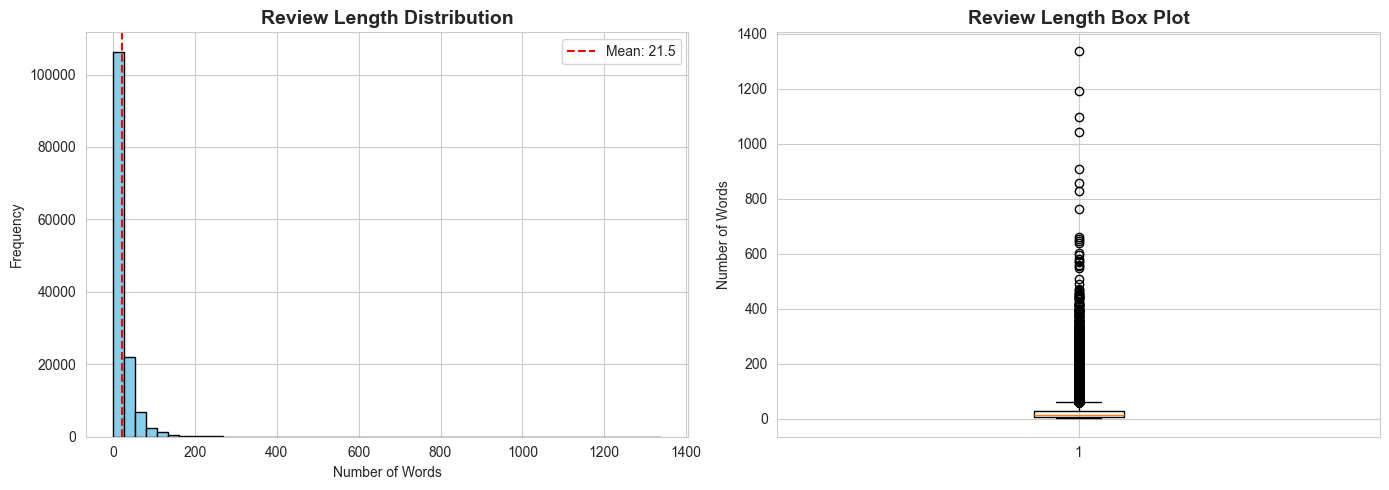

In [8]:
# Plot review length distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
ax1.hist(df['review_length'], bins=50, color='skyblue', edgecolor='black')
ax1.set_title('Review Length Distribution', fontsize=14, fontweight='bold')
ax1.set_xlabel('Number of Words')
ax1.set_ylabel('Frequency')
ax1.axvline(df['review_length'].mean(), color='red', linestyle='--', 
            label=f'Mean: {df["review_length"].mean():.1f}')
ax1.legend()

# Box plot
ax2.boxplot(df['review_length'])
ax2.set_title('Review Length Box Plot', fontsize=14, fontweight='bold')
ax2.set_ylabel('Number of Words')

plt.tight_layout()
plt.savefig('../reports/figures/review_length_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

## 4. Sentiment Distribution (if available)


😊 Sentiment Distribution:
Label
5    106516
4     22460
3      5923
1      2867
2      2554
Name: count, dtype: int64

Percentage:
Label
5    75.909350
4    16.006271
3     4.221066
1     2.043187
2     1.820125
Name: proportion, dtype: float64


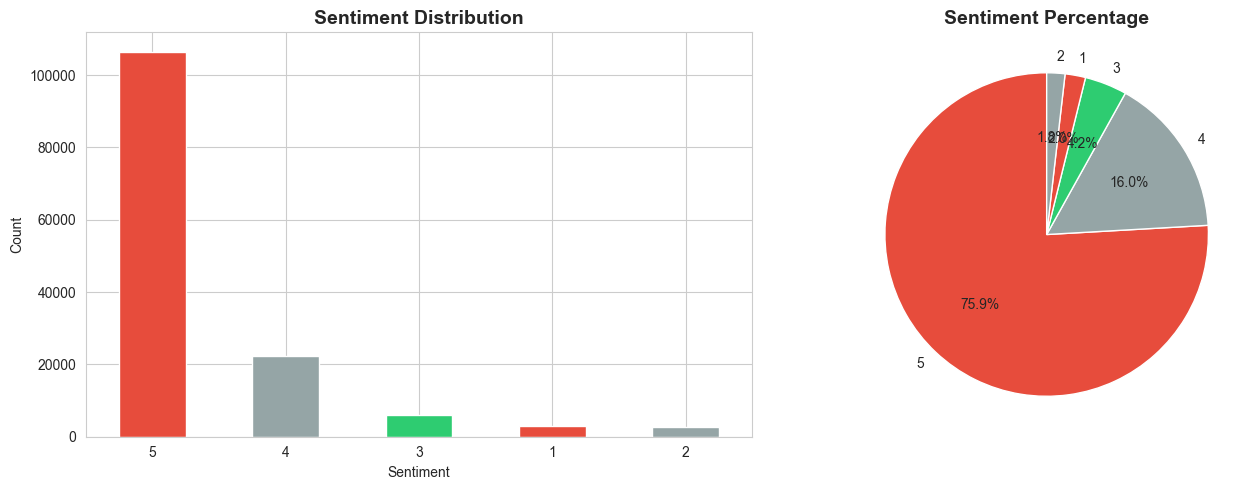

In [11]:
# Check if sentiment/label column exists
# Adjust column name as needed
if 'sentiment' in df.columns or 'Label' in df.columns:
    sentiment_col = 'sentiment' if 'sentiment' in df.columns else 'Label'
    
    print(f"\n😊 Sentiment Distribution:")
    print(df[sentiment_col].value_counts())
    print(f"\nPercentage:")
    print(df[sentiment_col].value_counts(normalize=True) * 100)
    
    # Plot distribution
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    
    # Bar chart
    sentiment_counts = df[sentiment_col].value_counts()
    sentiment_counts.plot(kind='bar', ax=ax1, color=['#e74c3c', '#95a5a6', '#2ecc71'])
    ax1.set_title('Sentiment Distribution', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Sentiment')
    ax1.set_ylabel('Count')
    ax1.tick_params(axis='x', rotation=0)
    
    # Pie chart
    colors = ['#e74c3c', '#95a5a6', '#2ecc71']
    ax2.pie(sentiment_counts.values, labels=sentiment_counts.index, 
            autopct='%1.1f%%', startangle=90, colors=colors)
    ax2.set_title('Sentiment Percentage', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('../reports/figures/sentiment_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("\n⚠️ No sentiment column found. You may need to create labels.")

## 5. Word Cloud

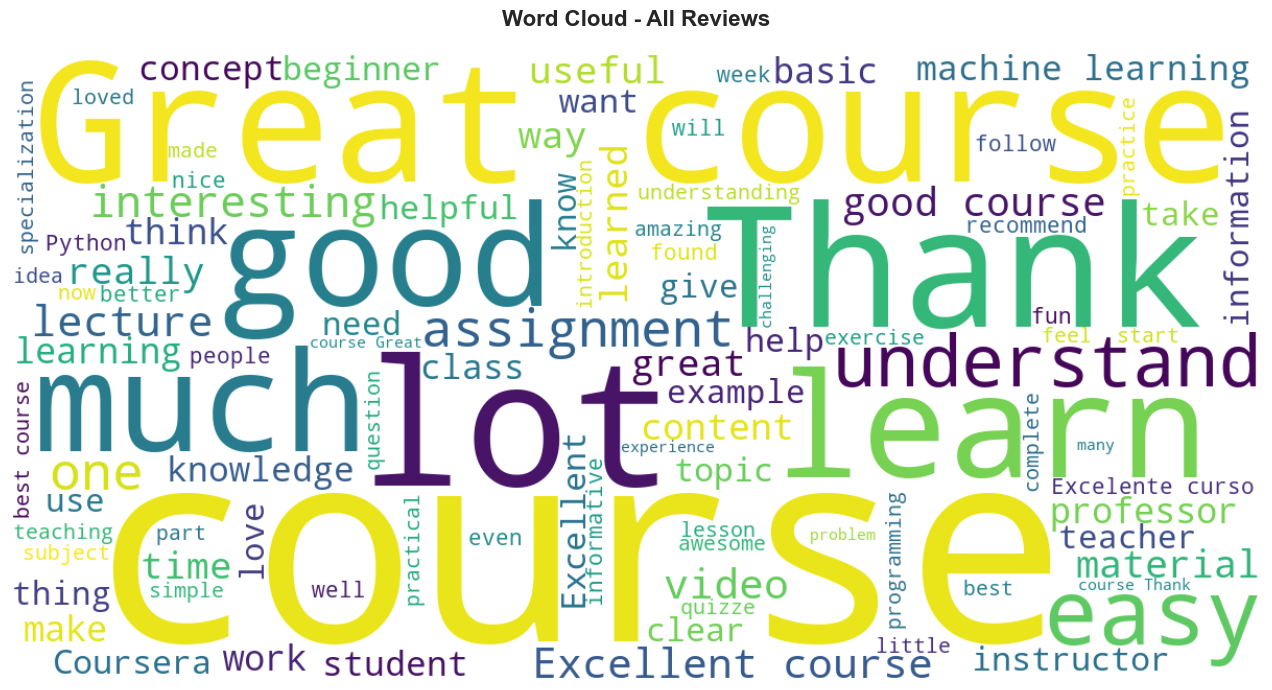

In [12]:
# Generate word cloud
text = ' '.join(df[text_column].astype(str))

wordcloud = WordCloud(
    width=1200,
    height=600,
    background_color='white',
    colormap='viridis',
    max_words=100
).generate(text)

plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - All Reviews', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('../reports/figures/wordcloud_all.png', dpi=300, bbox_inches='tight')
plt.show()

## 6. Most Common Words

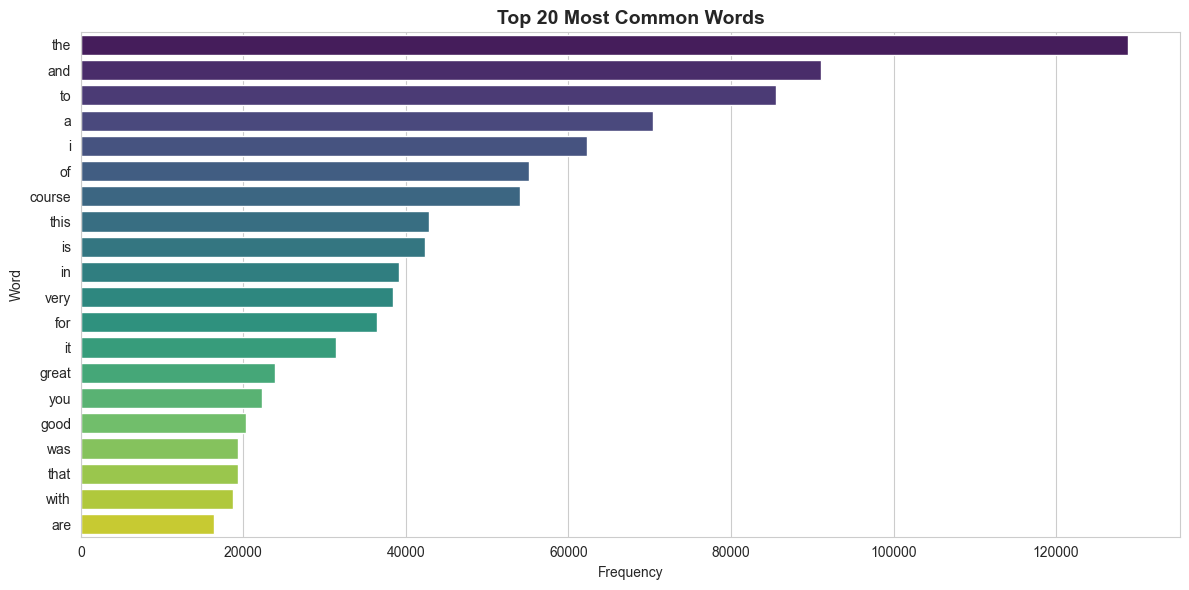


📝 Top 20 Words:
  Word  Frequency
   the     128815
   and      91100
    to      85546
     a      70435
     i      62242
    of      55186
course      54036
  this      42804
    is      42374
    in      39089
  very      38418
   for      36411
    it      31394
 great      23827
   you      22260
  good      20290
   was      19363
  that      19293
  with      18717
   are      16343


In [13]:
from collections import Counter

# Get all words
all_words = ' '.join(df[text_column].astype(str)).lower().split()

# Count words
word_freq = Counter(all_words)
top_20 = word_freq.most_common(20)

# Create dataframe
top_words_df = pd.DataFrame(top_20, columns=['Word', 'Frequency'])

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_words_df, x='Frequency', y='Word', palette='viridis')
plt.title('Top 20 Most Common Words', fontsize=14, fontweight='bold')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.tight_layout()
plt.savefig('../reports/figures/top_words.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n📝 Top 20 Words:")
print(top_words_df.to_string(index=False))

## 7. Key Insights

**Summary:**
- Total reviews: [Number]
- Average review length: [X] words
- Sentiment distribution: [Breakdown]
- Most common topics: [List]

**Next Steps:**
1. Data preprocessing (cleaning, tokenization)
2. Feature extraction (TF-IDF)
3. Model training (Logistic Regression, Naive Bayes)
4. Model evaluation and optimization